In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import geopandas as gp
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
#df2 = pd.DataFrame()
#tods = [1,2,3,4,5]

#for tod in tods:
#    print('Working on TOD ' + str(tod))
 #   df = pd.read_hdf('C:/Workspace/TNC-Demand-Model/Outputs/Chicago_TNC_Trips_20.h5', key = 'Weekday_' + str(tod))
  #  df = df[(df['INTERNAL_UNSUPPRESSED_FLAGGER'] == 1)|(df['INTERNAL_SUPPPRESSED_FLAGGER'] == 1)]

   # df = df.sample(frac = 0.01)
    #df2 = df2.append(df)

In [3]:
df2 = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Sample.csv', index_col = 0)

In [4]:
df2.head()

,YEAR,MONTH,DOW,HOUR,ORIGIN,DESTINATION,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,ORIGIN_COM_AREA,DEST_COM_AREA,FARE,TIP,ADDITIONAL_CHARGES,TOTAL_COST,SHARED_FLAGGER,NUM_TRIPS_POOLED,SPEED,TRIP_ID,TRIP_START_TIME,TRIP_END_TIME,INTERNAL_UNSUPPRESSED_FLAGGER,INTERNAL_SUPPPRESSED_FLAGGER,EXTERNAL_FLAGGER,INTERNAL_EXTERNAL_FLAGGER,AIRPORT_FLAGGER,TOD_1,TOD_2,TOD_3,TOD_4,TOD_5,TRIP_TYPE
77270553,2019,8,0,5,1.703106e+10,1.703116e+10,29.150000,7.7,6.0,16.0,17.5,0.0,2.55,20.05,0,1.0,15.849057,2d88e5359625e7bb4143dc1d2764ae2a71420f90,2019-08-05 05:45:00,2019-08-05 06:15:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed
21472972,2019,10,0,5,1.703107e+10,1.703184e+10,11.666667,4.8,7.0,32.0,10.0,0.0,2.55,12.55,0,1.0,24.685714,1e48126ab39275a1221864ab64258512eec57ecf,2019-10-21 05:45:00,2019-10-21 06:00:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed
46169129,2019,11,3,22,1.703108e+10,1.703106e+10,9.933333,4.2,8.0,6.0,10.0,2.0,0.00,12.00,1,1.0,25.369128,44799e6e4c31b760159e0e2beaba218adaa0858b,2019-11-21 22:00:00,2019-11-21 22:15:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed
139246972,2019,5,0,5,1.703119e+10,1.703119e+10,18.916667,5.9,25.0,11.0,15.0,0.0,0.00,15.00,1,2.0,18.713656,057370757db88466215dbe57b05f19a8e5346ba7,2019-05-13 05:15:00,2019-05-13 05:30:00,0,1,0,0,0,1,0,0,0,0,Internal Suppressed
57123553,2020,2,0,22,1.703122e+10,1.703122e+10,9.733333,2.7,48.0,69.0,5.0,0.0,2.48,7.48,1,1.0,16.643836,94b674a32716d4e946e3084a737e4dce892632a3,2020-02-10 22:00:00,2020-02-10 22:15:00,0,1,0,0,0,1,0,0,0,0,Internal Suppressed


In [5]:
df2[df2['EXTERNAL_FLAGGER'] ==1]

,YEAR,MONTH,DOW,HOUR,ORIGIN,DESTINATION,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,ORIGIN_COM_AREA,DEST_COM_AREA,FARE,TIP,ADDITIONAL_CHARGES,TOTAL_COST,SHARED_FLAGGER,NUM_TRIPS_POOLED,SPEED,TRIP_ID,TRIP_START_TIME,TRIP_END_TIME,INTERNAL_UNSUPPRESSED_FLAGGER,INTERNAL_SUPPPRESSED_FLAGGER,EXTERNAL_FLAGGER,INTERNAL_EXTERNAL_FLAGGER,AIRPORT_FLAGGER,TOD_1,TOD_2,TOD_3,TOD_4,TOD_5,TRIP_TYPE


In [6]:
df2[df2['INTERNAL_EXTERNAL_FLAGGER'] ==1]

,YEAR,MONTH,DOW,HOUR,ORIGIN,DESTINATION,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,ORIGIN_COM_AREA,DEST_COM_AREA,FARE,TIP,ADDITIONAL_CHARGES,TOTAL_COST,SHARED_FLAGGER,NUM_TRIPS_POOLED,SPEED,TRIP_ID,TRIP_START_TIME,TRIP_END_TIME,INTERNAL_UNSUPPRESSED_FLAGGER,INTERNAL_SUPPPRESSED_FLAGGER,EXTERNAL_FLAGGER,INTERNAL_EXTERNAL_FLAGGER,AIRPORT_FLAGGER,TOD_1,TOD_2,TOD_3,TOD_4,TOD_5,TRIP_TYPE


In [7]:
df2['AIRPORT_FLAGGER'] = np.where((df2['ORIGIN'].isin([17031980000,17031980100]))|(df2['DESTINATION'].isin([17031980000,1703198010])),1,0)

In [8]:
df2[df2['AIRPORT_FLAGGER'] == 1]

,YEAR,MONTH,DOW,HOUR,ORIGIN,DESTINATION,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,ORIGIN_COM_AREA,DEST_COM_AREA,FARE,TIP,ADDITIONAL_CHARGES,TOTAL_COST,SHARED_FLAGGER,NUM_TRIPS_POOLED,SPEED,TRIP_ID,TRIP_START_TIME,TRIP_END_TIME,INTERNAL_UNSUPPRESSED_FLAGGER,INTERNAL_SUPPPRESSED_FLAGGER,EXTERNAL_FLAGGER,INTERNAL_EXTERNAL_FLAGGER,AIRPORT_FLAGGER,TOD_1,TOD_2,TOD_3,TOD_4,TOD_5,TRIP_TYPE
139807070,2019,6,0,5,1.703133e+10,1.703198e+10,47.716667,19.1,33.0,76.0,52.5,0.0,7.55,60.05,0,1.0,24.016766,0a8954bca573101c2928f33ac7bd345512fc7059,2019-06-24 05:15:00,2019-06-24 06:00:00,1,0,0,0,1,1,0,0,0,0,Internal Unsuppressed
45237467,2019,11,2,23,1.703198e+10,1.703183e+10,21.766667,10.7,56.0,28.0,20.0,4.0,7.55,31.55,0,1.0,29.494640,2dea49ab45b846630d881b555d473d1f4e6245bd,2019-11-06 23:00:00,2019-11-06 23:15:00,1,0,0,0,1,1,0,0,0,0,Internal Unsuppressed
131298064,2019,9,4,5,1.703108e+10,1.703198e+10,26.833333,16.6,8.0,76.0,22.5,0.0,7.55,30.05,0,1.0,37.118012,c71ef0ff60c6aa5975a646f851d259e62a208fb0,2019-09-20 05:15:00,2019-09-20 05:45:00,1,0,0,0,1,1,0,0,0,0,Internal Unsuppressed
900722,2019,4,1,23,1.703198e+10,1.703121e+10,22.183333,14.8,56.0,21.0,17.5,0.0,7.55,25.05,0,1.0,40.030053,5584bdae401d0433555a0a648a796c69f2b04fc3,2019-04-16 23:15:00,2019-04-16 23:45:00,1,0,0,0,1,1,0,0,0,0,Internal Unsuppressed
99490893,2019,2,1,5,1.703108e+10,1.703198e+10,22.466667,18.4,8.0,76.0,32.5,0.0,7.55,40.05,0,1.0,49.139466,772ccbeaa52c7e0e03fe4b6c8cadfeb3f201d629,2019-02-19 05:00:00,2019-02-19 05:30:00,1,0,0,0,1,1,0,0,0,0,Internal Unsuppressed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110029590,2019,1,0,20,1.703198e+10,1.703124e+10,22.316667,12.8,56.0,24.0,17.5,7.0,8.15,32.65,0,1.0,34.413742,c6b0fde8b220e8007cb656f654606f03ed9db93d,2019-01-21 20:15:00,2019-01-21 20:30:00,1,0,0,0,1,0,0,0,0,1,Internal Unsuppressed
92992650,2019,2,4,20,1.703198e+10,1.703143e+10,30.116667,16.1,56.0,43.0,25.0,0.0,8.15,33.15,0,1.0,32.075263,4627c58a76e96920b7b3a486205b94c2bbbc0edd,2019-02-01 20:00:00,2019-02-01 20:30:00,1,0,0,0,1,0,0,0,0,1,Internal Unsuppressed
15088340,2019,4,1,19,1.703108e+10,1.703198e+10,28.566667,16.8,8.0,76.0,22.5,5.0,7.55,35.05,0,1.0,35.285881,d5296b9c3f99649f5b849ac1468a407b0d3d74cb,2019-04-09 19:45:00,2019-04-09 20:15:00,1,0,0,0,1,0,0,0,0,1,Internal Unsuppressed
35873846,2019,12,3,20,1.703198e+10,1.703108e+10,32.483333,18.2,76.0,8.0,25.0,5.0,7.55,37.55,0,1.0,33.617240,b01b39fcc2c615de7783715b36a45588058391ba,2019-12-05 20:15:00,2019-12-05 21:00:00,1,0,0,0,1,0,0,0,0,1,Internal Unsuppressed


In [9]:
df2['TOD_1'] = np.where( (df2['HOUR'] <  6)|(df2['HOUR'] >= 22), 1,0)
df2['TOD_2'] = np.where( (df2['HOUR'] <  9)&(df2['HOUR'] >= 6), 1,0)
df2['TOD_3'] = np.where( (df2['HOUR'] <  16)&(df2['HOUR'] >= 9), 1,0)
df2['TOD_4'] = np.where( (df2['HOUR'] <  19)&(df2['HOUR'] >= 16), 1,0)
df2['TOD_5'] = np.where( (df2['HOUR'] <  22)&(df2['HOUR'] >= 19), 1,0)


In [10]:
df2.columns

Index(['YEAR', 'MONTH', 'DOW', 'HOUR', 'ORIGIN', 'DESTINATION',
       'TRAVEL_TIME_MINUTES', 'TRIP_LENGTH_MILES', 'ORIGIN_COM_AREA',
       'DEST_COM_AREA', 'FARE', 'TIP', 'ADDITIONAL_CHARGES', 'TOTAL_COST',
       'SHARED_FLAGGER', 'NUM_TRIPS_POOLED', 'SPEED', 'TRIP_ID',
       'TRIP_START_TIME', 'TRIP_END_TIME', 'INTERNAL_UNSUPPRESSED_FLAGGER',
       'INTERNAL_SUPPPRESSED_FLAGGER', 'EXTERNAL_FLAGGER',
       'INTERNAL_EXTERNAL_FLAGGER', 'AIRPORT_FLAGGER', 'TOD_1', 'TOD_2',
       'TOD_3', 'TOD_4', 'TOD_5', 'TRIP_TYPE'],
      dtype='object')

In [11]:
#roughly 68% of shared trips are matched with another rider

len(df2[(df2['SHARED_FLAGGER'] == 1)&(df2['NUM_TRIPS_POOLED'] > 1)])/len(df2[df2['SHARED_FLAGGER'] == 1])

0.6875600384245918

In [12]:
acs = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Chicago_ACS_Data.csv')

In [13]:
acs.head()

,Unnamed: 0,YEAR,MONTH,TOD,CENSUS_TRACT,TOTAL_POP,TOTAL_MALE,TOTAL_FEMALE,AGE_5U,AGE_5_9,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_59,AGE_60_64,AGE_65_74,AGE_75_84,AGE_85P,MEDIAN_AGE,TOTAL_HHLDS,AVG_HHLD_SIZE,AVG_FAMILY_SIZE,TOTAL_POP_18_24,TOTAL_POP_18_24_NO_HIGH_SCHOOL,TOTAL_POP_18_24_HIGH_SCHOOL,TOTAL_POP_18_24_SOME_COLLEGE,TOTAL_POP_18_24_SOME_BACHELORS_HIGHER,TOTAL_POP_25P,TOTAL_POP_25P_LESS_THAN_9TH,TOTAL_POP_25P_9TH_TO_12TH,TOTAL_POP_25P_HIGH_SCHOOL,TOTAL_POP_25P_SOME_COLLEGE,TOTAL_POP_25P_ASSOCIATES,TOTAL_POP_25P_BACHELORS,TOTAL_POP_25P_GRADUATE,TOTAL_POP_25P_HIGH_SCHOOL_HIGHER,TOTAL_POP_25P_BACHELORS_HIGHER,TOTAL_HHLDS_LESS_10K,TOTAL_HHLDS_10K_15K,TOTAL_HHLDS_15K_25K,TOTAL_HHLDS_25K_35K,TOTAL_HHLDS_35K_50K,TOTAL_HHLDS_50K_75K,TOTAL_HHLDS_75K_100K,TOTAL_HHLDS_100K_150K,TOTAL_HHLDS_150K_200K,TOTAL_HHLDS_200KP,HHLDS_MEDIAN_INCOME,HHLDS_MEAN_INCOME,HHLDS_0_VEH,HHLDS_1_VEH,HHLDS_2_VEH,HHLDS_3P_VEH,AVG_VEH_PER_HHLD
0,0,2018,11,1,17031010100,4522.0,2301.0,2221.0,384.0,253.0,240.0,51.0,431.0,845.0,761.0,552.0,543.0,210.0,192.0,18.0,42.0,35.3,2316.0,1.89,3.00,466.0,0.0,133.0,163.0,170.0,3163.0,26.0,314.0,533.0,729.0,78.0,916.0,567.0,2823.0,1483.0,20.5,4.8,13.1,10.4,8.5,12.3,10.4,13.8,3.8,2.5,37985.0,56105.0,1162.0,788.0,344.0,22.0,0.665803
1,1,2018,11,1,17031010201,7039.0,3701.0,3338.0,480.0,507.0,479.0,430.0,259.0,1225.0,1390.0,956.0,395.0,454.0,220.0,208.0,36.0,36.3,2688.0,2.55,3.49,395.0,147.0,94.0,104.0,50.0,4884.0,526.0,448.0,1202.0,894.0,309.0,947.0,558.0,3910.0,1505.0,17.6,2.5,12.6,15.1,6.7,22.4,8.0,12.3,1.2,1.6,39549.0,61626.0,751.0,1317.0,521.0,99.0,0.988095
2,2,2018,11,1,17031010202,2852.0,1390.0,1462.0,245.0,122.0,123.0,174.0,178.0,526.0,289.0,295.0,290.0,228.0,266.0,83.0,33.0,35.7,1102.0,2.30,3.54,305.0,111.0,117.0,51.0,26.0,2010.0,222.0,186.0,396.0,403.0,134.0,425.0,244.0,1602.0,669.0,12.0,2.5,18.2,13.6,15.2,17.9,8.1,8.8,2.5,1.1,38370.0,49615.0,464.0,449.0,169.0,20.0,0.768603
3,3,2018,11,1,17031010300,6650.0,3294.0,3356.0,351.0,342.0,150.0,267.0,315.0,1053.0,1190.0,954.0,407.0,374.0,719.0,291.0,237.0,41.6,3037.0,1.87,2.84,448.0,184.0,32.0,78.0,154.0,5225.0,281.0,321.0,1371.0,975.0,217.0,1029.0,1031.0,4623.0,2060.0,10.9,6.8,7.9,18.7,14.7,13.1,14.2,5.0,3.3,5.3,38866.0,69967.0,993.0,1344.0,613.0,87.0,0.932170
4,4,2018,11,1,17031010400,5153.0,2405.0,2748.0,84.0,232.0,148.0,1178.0,907.0,839.0,534.0,461.0,163.0,266.0,254.0,51.0,36.0,25.2,1938.0,1.86,2.98,1981.0,0.0,488.0,1265.0,228.0,2604.0,50.0,36.0,294.0,367.0,152.0,1070.0,635.0,2518.0,1705.0,15.2,4.7,12.4,9.2,16.8,15.3,9.3,11.8,3.8,1.4,39152.0,54235.0,655.0,1089.0,194.0,0.0,0.762126


In [14]:
acs.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'TOD', 'CENSUS_TRACT', 'TOTAL_POP',
       'TOTAL_MALE', 'TOTAL_FEMALE', 'AGE_5U', 'AGE_5_9', 'AGE_10_14',
       'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54',
       'AGE_55_59', 'AGE_60_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85P',
       'MEDIAN_AGE', 'TOTAL_HHLDS', 'AVG_HHLD_SIZE', 'AVG_FAMILY_SIZE',
       'TOTAL_POP_18_24', 'TOTAL_POP_18_24_NO_HIGH_SCHOOL',
       'TOTAL_POP_18_24_HIGH_SCHOOL', 'TOTAL_POP_18_24_SOME_COLLEGE',
       'TOTAL_POP_18_24_SOME_BACHELORS_HIGHER', 'TOTAL_POP_25P',
       'TOTAL_POP_25P_LESS_THAN_9TH', 'TOTAL_POP_25P_9TH_TO_12TH',
       'TOTAL_POP_25P_HIGH_SCHOOL', 'TOTAL_POP_25P_SOME_COLLEGE',
       'TOTAL_POP_25P_ASSOCIATES', 'TOTAL_POP_25P_BACHELORS',
       'TOTAL_POP_25P_GRADUATE', 'TOTAL_POP_25P_HIGH_SCHOOL_HIGHER',
       'TOTAL_POP_25P_BACHELORS_HIGHER', 'TOTAL_HHLDS_LESS_10K',
       'TOTAL_HHLDS_10K_15K', 'TOTAL_HHLDS_15K_25K', 'TOTAL_HHLDS_25K_35K',
       'TOTAL_HHLDS_35K_50K', 'TOTAL_HHLD

C:\Users\ramu225\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


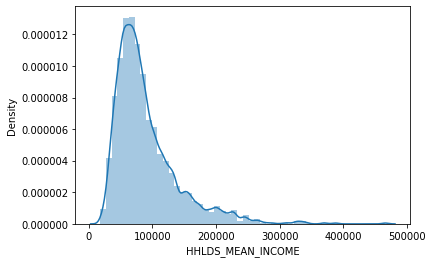

In [15]:

sns.distplot(acs['HHLDS_MEAN_INCOME'])

C:\Users\ramu225\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


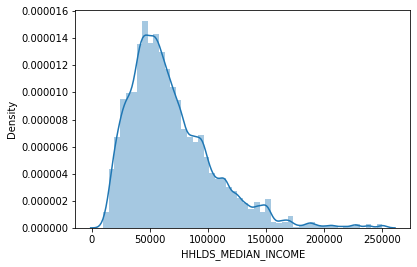

In [16]:
sns.distplot(acs['HHLDS_MEDIAN_INCOME'])

In [17]:
# the average median income matches the average income for chicago households from other sources
acs['HHLDS_MEDIAN_INCOME'].mean()

67711.40350042804

In [18]:
acs['MEDIAN_AGE'].mean()

37.447233840302914

In [19]:
acs['HHLDS_UNDER_35k'] = acs['TOTAL_HHLDS_LESS_10K'] + acs['TOTAL_HHLDS_10K_15K'] + acs['TOTAL_HHLDS_15K_25K'] + acs['TOTAL_HHLDS_25K_35K']

acs['HHLDS_35k_100k'] = acs['TOTAL_HHLDS_35K_50K'] + acs['TOTAL_HHLDS_50K_75K'] + acs['TOTAL_HHLDS_75K_100K']

acs['HHLDS_OVER_100k'] = acs['TOTAL_HHLDS_100K_150K'] + acs['TOTAL_HHLDS_150K_200K'] + acs['TOTAL_HHLDS_200KP']


In [20]:
acs2 = acs[['YEAR','MONTH','TOD','CENSUS_TRACT','TOTAL_POP','MEDIAN_AGE','TOTAL_HHLDS','AVG_HHLD_SIZE','HHLDS_MEAN_INCOME','HHLDS_UNDER_35k','HHLDS_35k_100k','HHLDS_OVER_100k','HHLDS_0_VEH','AVG_VEH_PER_HHLD','HHLDS_MEDIAN_INCOME','TOTAL_POP_25P_BACHELORS_HIGHER','TOTAL_MALE', 'TOTAL_FEMALE','MEDIAN_AGE']]

In [21]:
#otp = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/OTP Travel Times/Car/20190206/traveltime_matrix_1-36.csv')
otp = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/OTP Travel Times/Car/20190605/traveltime_matrix_0-29.csv')

In [22]:
dist = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Distance_Matrix.csv', index_col = 0)

In [23]:
otp['ORIGIN'] = otp.origin.astype(float)
otp['DESTINATION'] = otp.destination.astype(float)

In [24]:
dist.head()

,DESTINATION,DISTANCE
ORIGIN,,
17031842400,17031842400,0.000000
17031842400,17031840300,6.739847
17031842400,17031841100,7.494828
17031842400,17031841200,8.275904
17031842400,17031839000,8.873522


In [25]:
len(dist)

641601

In [26]:
len(otp)

641601

In [27]:
df3 = df2.merge(otp[['origin','destination','walk_distance','travel_time']], how = 'left', left_on = ['ORIGIN','DESTINATION'], right_on = ['origin','destination'])

In [28]:
df3['TOD'] = np.where(df3['TOD_1'] == 1, 1, np.nan)
df3['TOD'] = np.where(df3['TOD_2'] == 1, 2, df3['TOD'])
df3['TOD'] = np.where(df3['TOD_3'] == 1, 3, df3['TOD'])
df3['TOD'] = np.where(df3['TOD_4'] == 1, 4, df3['TOD'])
df3['TOD'] = np.where(df3['TOD_5'] == 1, 5, df3['TOD'])

In [29]:
df3 = df3.merge(acs2, how = 'left', left_on = ['YEAR','MONTH','TOD','ORIGIN'], right_on = ['YEAR','MONTH','TOD','CENSUS_TRACT'])
df3 = df3.merge(acs2, how = 'left', left_on = ['YEAR','MONTH','TOD','DESTINATION'], right_on = ['YEAR','MONTH','TOD','CENSUS_TRACT'], suffixes = ('_ORIGIN','_DESTINATION'))


In [30]:
df3.columns

Index(['YEAR', 'MONTH', 'DOW', 'HOUR', 'ORIGIN', 'DESTINATION',
       'TRAVEL_TIME_MINUTES', 'TRIP_LENGTH_MILES', 'ORIGIN_COM_AREA',
       'DEST_COM_AREA', 'FARE', 'TIP', 'ADDITIONAL_CHARGES', 'TOTAL_COST',
       'SHARED_FLAGGER', 'NUM_TRIPS_POOLED', 'SPEED', 'TRIP_ID',
       'TRIP_START_TIME', 'TRIP_END_TIME', 'INTERNAL_UNSUPPRESSED_FLAGGER',
       'INTERNAL_SUPPPRESSED_FLAGGER', 'EXTERNAL_FLAGGER',
       'INTERNAL_EXTERNAL_FLAGGER', 'AIRPORT_FLAGGER', 'TOD_1', 'TOD_2',
       'TOD_3', 'TOD_4', 'TOD_5', 'TRIP_TYPE', 'origin', 'destination',
       'walk_distance', 'travel_time', 'TOD', 'CENSUS_TRACT_ORIGIN',
       'TOTAL_POP_ORIGIN', 'MEDIAN_AGE_ORIGIN', 'TOTAL_HHLDS_ORIGIN',
       'AVG_HHLD_SIZE_ORIGIN', 'HHLDS_MEAN_INCOME_ORIGIN',
       'HHLDS_UNDER_35k_ORIGIN', 'HHLDS_35k_100k_ORIGIN',
       'HHLDS_OVER_100k_ORIGIN', 'HHLDS_0_VEH_ORIGIN',
       'AVG_VEH_PER_HHLD_ORIGIN', 'HHLDS_MEDIAN_INCOME_ORIGIN',
       'TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN', 'TOTAL_MALE_ORIGIN',
  

In [31]:
df3 = df3.merge(dist, how = 'left', on = ['ORIGIN','DESTINATION'])

In [32]:
df3[(np.isnan(df3['travel_time']))&(df3['INTERNAL_SUPPPRESSED_FLAGGER'] == 1)]['DESTINATION'].astype(str)

Series([], Name: DESTINATION, dtype: object)

In [33]:
df3[np.isnan(df3['travel_time'])]['travel_time']

Series([], Name: travel_time, dtype: int64)

In [34]:
otp[(otp['origin'] ==  17031010201)&(otp['destination'] == 17031836400)]

,year,depart_time,origin,destination,walk_distance,travel_time,ORIGIN,DESTINATION
42682,20190605,0:29:00,17031010201,17031836400,51.0,2422,1.703101e+10,1.703184e+10


In [35]:
#shared = df2[df2['SHARED_FLAGGER'] == 1]
#private = df2[df2['SHARED_FLAGGER'] == 0]

In [36]:
def set_trip_type(row):
    
    if row['INTERNAL_SUPPPRESSED_FLAGGER'] == 1:
        tt = 'Internal Suppressed'
        
    elif row['INTERNAL_UNSUPPRESSED_FLAGGER'] == 1:
        tt = 'Internal Unsuppressed'
        
    else:
        tt = 'External'
        
    return tt

In [37]:
df3['TRIP_TYPE'] = df3.apply(lambda row: set_trip_type(row),axis = 1)

In [38]:
df3.head()

,YEAR,MONTH,DOW,HOUR,ORIGIN,DESTINATION,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,ORIGIN_COM_AREA,DEST_COM_AREA,FARE,TIP,ADDITIONAL_CHARGES,TOTAL_COST,SHARED_FLAGGER,NUM_TRIPS_POOLED,SPEED,TRIP_ID,TRIP_START_TIME,TRIP_END_TIME,INTERNAL_UNSUPPRESSED_FLAGGER,INTERNAL_SUPPPRESSED_FLAGGER,EXTERNAL_FLAGGER,INTERNAL_EXTERNAL_FLAGGER,AIRPORT_FLAGGER,TOD_1,TOD_2,TOD_3,TOD_4,TOD_5,TRIP_TYPE,origin,destination,walk_distance,travel_time,TOD,CENSUS_TRACT_ORIGIN,TOTAL_POP_ORIGIN,MEDIAN_AGE_ORIGIN,TOTAL_HHLDS_ORIGIN,AVG_HHLD_SIZE_ORIGIN,HHLDS_MEAN_INCOME_ORIGIN,HHLDS_UNDER_35k_ORIGIN,HHLDS_35k_100k_ORIGIN,HHLDS_OVER_100k_ORIGIN,HHLDS_0_VEH_ORIGIN,AVG_VEH_PER_HHLD_ORIGIN,HHLDS_MEDIAN_INCOME_ORIGIN,TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN,TOTAL_MALE_ORIGIN,TOTAL_FEMALE_ORIGIN,MEDIAN_AGE_ORIGIN,CENSUS_TRACT_DESTINATION,TOTAL_POP_DESTINATION,MEDIAN_AGE_DESTINATION,TOTAL_HHLDS_DESTINATION,AVG_HHLD_SIZE_DESTINATION,HHLDS_MEAN_INCOME_DESTINATION,HHLDS_UNDER_35k_DESTINATION,HHLDS_35k_100k_DESTINATION,HHLDS_OVER_100k_DESTINATION,HHLDS_0_VEH_DESTINATION,AVG_VEH_PER_HHLD_DESTINATION,HHLDS_MEDIAN_INCOME_DESTINATION,TOTAL_POP_25P_BACHELORS_HIGHER_DESTINATION,TOTAL_MALE_DESTINATION,TOTAL_FEMALE_DESTINATION,MEDIAN_AGE_DESTINATION,DISTANCE
0,2019,8,0,5,1.703106e+10,1.703116e+10,29.150000,7.7,6.0,16.0,17.5,0.0,2.55,20.05,0,1.0,15.849057,2d88e5359625e7bb4143dc1d2764ae2a71420f90,2019-08-05 05:45:00,2019-08-05 06:15:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed,17031062100,17031160100,63.0,1352,1.0,17031062100,3722.0,29.8,1901.0,1.96,128052.0,22.6,30.4,47.0,743.0,0.731194,91438.0,2196.0,1876.0,1846.0,29.8,17031160100,2537.0,38.0,988.0,2.56,90018.0,29.0,35.7,35.3,91.0,1.377530,68750.0,725.0,1195.0,1342.0,38.0,4.927800
1,2019,10,0,5,1.703107e+10,1.703184e+10,11.666667,4.8,7.0,32.0,10.0,0.0,2.55,12.55,0,1.0,24.685714,1e48126ab39275a1221864ab64258512eec57ecf,2019-10-21 05:45:00,2019-10-21 06:00:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed,17031070700,17031839100,84.0,1191,1.0,17031070700,4191.0,30.0,1642.0,2.55,199223.0,15.4,21.3,63.3,280.0,1.251523,121298.0,2303.0,2366.0,1825.0,30.0,17031839100,7545.0,30.0,3780.0,1.61,147943.0,14.2,35.5,50.4,1827.0,0.575397,101000.0,4261.0,4226.0,3319.0,30.0,3.945020
2,2019,11,3,22,1.703108e+10,1.703106e+10,9.933333,4.2,8.0,6.0,10.0,2.0,0.00,12.00,1,1.0,25.369128,44799e6e4c31b760159e0e2beaba218adaa0858b,2019-11-21 22:00:00,2019-11-21 22:15:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed,17031081202,17031060800,31.0,528,1.0,17031081202,2928.0,57.6,1703.0,1.72,230511.0,8.3,29.5,62.2,510.0,0.864357,136010.0,2074.0,1379.0,1549.0,57.6,17031060800,5037.0,35.0,3188.0,1.58,99139.0,13.7,45.6,40.6,991.0,0.767252,87552.0,3483.0,2587.0,2450.0,35.0,3.627155
3,2019,5,0,5,1.703119e+10,1.703119e+10,18.916667,5.9,25.0,11.0,15.0,0.0,0.00,15.00,1,2.0,18.713656,057370757db88466215dbe57b05f19a8e5346ba7,2019-05-13 05:15:00,2019-05-13 05:30:00,0,1,0,0,0,1,0,0,0,0,Internal Suppressed,17031190100,17031191301,24.0,811,1.0,17031190100,2453.0,35.2,807.0,3.04,55259.0,44.4,41.6,14.1,242.0,1.039653,41103.0,257.0,1217.0,1236.0,35.2,17031191301,5525.0,33.5,1505.0,3.67,63742.0,33.2,43.4,23.3,388.0,1.336213,50046.0,392.0,2900.0,2625.0,33.5,2.121350
4,2020,2,0,22,1.703122e+10,1.703122e+10,9.733333,2.7,48.0,69.0,5.0,0.0,2.48,7.48,1,1.0,16.643836,94b674a32716d4e946e3084a737e4dce892632a3,2020-02-10 22:00:00,2020-02-10 22:15:00,0,1,0,0,0,1,0,0,0,0,Internal Suppressed,17031220500,17031222800,9.0,455,1.0,17031220500,2503.0,31.5,1236.0,2.03,103036.0,19.6,33.9,46.3,294.0,1.003236,94844.0,1568.0,1227.0,1276.0,31.5,17031222800,1012.0,27.6,364.0,2.78,73443.0,34.0,49.2,16.7,87.0,1.085165,50313.0,265.0,443.0,569.0,27.6,1.037220


In [39]:
lehd = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/CHI_WAC.csv')

In [40]:
lehd.head()

,Unnamed: 0,YEAR,MONTH,TRACTCE10,CNS01,CNS02,CNS03,CNS04,CNS05,CNS06,CNS07,CNS08,CNS09,CNS10,CNS11,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20
0,0,2018,11,10100,0.0,0.0,0.0,0.000000,0.000000,3.663537,13.435834,1.178232,0.000000,4.708903,18.053796,9.356842,0.0,2.019578,0.000000,314.753323,0.00000,0.999367,3.912377,0.0
1,1,2018,11,10201,0.0,0.0,0.0,5.039014,0.000000,2.747653,10.556726,0.000000,1.798667,0.000000,2.005977,1.871368,0.0,2.019578,71.277244,9.167573,0.00000,23.984802,1.956189,0.0
2,2,2018,11,10202,0.0,0.0,0.0,0.000000,18.646704,4.579422,135.318038,10.604088,0.000000,12.243149,0.000000,4.678421,0.0,54.528606,44.667073,423.745574,0.00000,29.981003,32.277113,0.0
3,3,2018,11,10300,0.0,0.0,0.0,19.148252,22.790416,0.915884,9.597024,2.356464,1.798667,9.417807,14.041841,5.614105,0.0,0.000000,52.269979,916.757251,2.27544,40.974038,16.627604,0.0
4,4,2018,11,10400,0.0,0.0,0.0,0.000000,2.071856,5.495306,79.655299,0.000000,0.000000,9.417807,2.005977,8.421158,0.0,10.097890,4435.345289,6.111715,3.03392,572.637158,21.518076,0.0


In [41]:
lehd['TOTAL_EMP'] = lehd['CNS01'] + lehd['CNS02'] + lehd['CNS03'] + lehd['CNS04'] + lehd['CNS05'] + lehd['CNS06'] + lehd['CNS07'] + lehd['CNS08'] + lehd['CNS09'] + lehd['CNS10'] + lehd['CNS11'] + lehd['CNS12'] + lehd['CNS13'] + lehd['CNS14'] + lehd['CNS15'] + lehd['CNS16'] + lehd['CNS17'] + lehd['CNS18'] + lehd['CNS19'] + lehd['CNS20']

In [42]:
lehd['TRACTCE10'][1]

10201

In [43]:
df3['TRACTCE10_PICKUP'] = df3.ORIGIN.astype(str)
df3['TRACTCE10_PICKUP'] = df3['TRACTCE10_PICKUP'].apply(lambda x : x[5:11])
df3['TRACTCE10_PICKUP'] = df3['TRACTCE10_PICKUP'].astype(int)
df3['TRACTCE10_DEST'] = df3.DESTINATION.astype(str)
df3['TRACTCE10_DEST'] = df3['TRACTCE10_DEST'].apply(lambda x : x[5:11])
df3['TRACTCE10_DEST'] = df3['TRACTCE10_DEST'].astype(int)


In [44]:
df3['TRACTCE10_PICKUP'][1]

70700

In [45]:
df3 = df3.merge(lehd[['TOTAL_EMP','TRACTCE10','MONTH','YEAR']], how = 'left', left_on = ['TRACTCE10_PICKUP','MONTH','YEAR'], right_on = ['TRACTCE10','MONTH','YEAR'])

In [46]:
df3 = df3.merge(lehd[['TOTAL_EMP','TRACTCE10','MONTH','YEAR']], how = 'left', left_on = ['TRACTCE10_DEST','MONTH','YEAR'], right_on = ['TRACTCE10','MONTH','YEAR'], suffixes = ('_ORIGIN','_DESTINATION'))

In [47]:
df3.head()

,YEAR,MONTH,DOW,HOUR,ORIGIN,DESTINATION,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,ORIGIN_COM_AREA,DEST_COM_AREA,FARE,TIP,ADDITIONAL_CHARGES,TOTAL_COST,SHARED_FLAGGER,NUM_TRIPS_POOLED,SPEED,TRIP_ID,TRIP_START_TIME,TRIP_END_TIME,INTERNAL_UNSUPPRESSED_FLAGGER,INTERNAL_SUPPPRESSED_FLAGGER,EXTERNAL_FLAGGER,INTERNAL_EXTERNAL_FLAGGER,AIRPORT_FLAGGER,TOD_1,TOD_2,TOD_3,TOD_4,TOD_5,TRIP_TYPE,origin,destination,walk_distance,travel_time,TOD,CENSUS_TRACT_ORIGIN,TOTAL_POP_ORIGIN,MEDIAN_AGE_ORIGIN,TOTAL_HHLDS_ORIGIN,AVG_HHLD_SIZE_ORIGIN,HHLDS_MEAN_INCOME_ORIGIN,HHLDS_UNDER_35k_ORIGIN,HHLDS_35k_100k_ORIGIN,HHLDS_OVER_100k_ORIGIN,HHLDS_0_VEH_ORIGIN,AVG_VEH_PER_HHLD_ORIGIN,HHLDS_MEDIAN_INCOME_ORIGIN,TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN,TOTAL_MALE_ORIGIN,TOTAL_FEMALE_ORIGIN,MEDIAN_AGE_ORIGIN,CENSUS_TRACT_DESTINATION,TOTAL_POP_DESTINATION,MEDIAN_AGE_DESTINATION,TOTAL_HHLDS_DESTINATION,AVG_HHLD_SIZE_DESTINATION,HHLDS_MEAN_INCOME_DESTINATION,HHLDS_UNDER_35k_DESTINATION,HHLDS_35k_100k_DESTINATION,HHLDS_OVER_100k_DESTINATION,HHLDS_0_VEH_DESTINATION,AVG_VEH_PER_HHLD_DESTINATION,HHLDS_MEDIAN_INCOME_DESTINATION,TOTAL_POP_25P_BACHELORS_HIGHER_DESTINATION,TOTAL_MALE_DESTINATION,TOTAL_FEMALE_DESTINATION,MEDIAN_AGE_DESTINATION,DISTANCE,TRACTCE10_PICKUP,TRACTCE10_DEST,TOTAL_EMP_ORIGIN,TRACTCE10_ORIGIN,TOTAL_EMP_DESTINATION,TRACTCE10_DESTINATION
0,2019,8,0,5,1.703106e+10,1.703116e+10,29.150000,7.7,6.0,16.0,17.5,0.0,2.55,20.05,0,1.0,15.849057,2d88e5359625e7bb4143dc1d2764ae2a71420f90,2019-08-05 05:45:00,2019-08-05 06:15:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed,17031062100,17031160100,63.0,1352,1.0,17031062100,3722.0,29.8,1901.0,1.96,128052.0,22.6,30.4,47.0,743.0,0.731194,91438.0,2196.0,1876.0,1846.0,29.8,17031160100,2537.0,38.0,988.0,2.56,90018.0,29.0,35.7,35.3,91.0,1.377530,68750.0,725.0,1195.0,1342.0,38.0,4.927800,62100,160100,1427.539338,62100.0,311.837957,160100.0
1,2019,10,0,5,1.703107e+10,1.703184e+10,11.666667,4.8,7.0,32.0,10.0,0.0,2.55,12.55,0,1.0,24.685714,1e48126ab39275a1221864ab64258512eec57ecf,2019-10-21 05:45:00,2019-10-21 06:00:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed,17031070700,17031839100,84.0,1191,1.0,17031070700,4191.0,30.0,1642.0,2.55,199223.0,15.4,21.3,63.3,280.0,1.251523,121298.0,2303.0,2366.0,1825.0,30.0,17031839100,7545.0,30.0,3780.0,1.61,147943.0,14.2,35.5,50.4,1827.0,0.575397,101000.0,4261.0,4226.0,3319.0,30.0,3.945020,70700,839100,1731.113309,70700.0,338732.975448,839100.0
2,2019,11,3,22,1.703108e+10,1.703106e+10,9.933333,4.2,8.0,6.0,10.0,2.0,0.00,12.00,1,1.0,25.369128,44799e6e4c31b760159e0e2beaba218adaa0858b,2019-11-21 22:00:00,2019-11-21 22:15:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed,17031081202,17031060800,31.0,528,1.0,17031081202,2928.0,57.6,1703.0,1.72,230511.0,8.3,29.5,62.2,510.0,0.864357,136010.0,2074.0,1379.0,1549.0,57.6,17031060800,5037.0,35.0,3188.0,1.58,99139.0,13.7,45.6,40.6,991.0,0.767252,87552.0,3483.0,2587.0,2450.0,35.0,3.627155,81202,60800,1407.188513,81202.0,491.422347,60800.0
3,2019,5,0,5,1.703119e+10,1.703119e+10,18.916667,5.9,25.0,11.0,15.0,0.0,0.00,15.00,1,2.0,18.713656,057370757db88466215dbe57b05f19a8e5346ba7,2019-05-13 05:15:00,2019-05-13 05:30:00,0,1,0,0,0,1,0,0,0,0,Internal Suppressed,17031190100,17031191301,24.0,811,1.0,17031190100,2453.0,35.2,807.0,3.04,55259.0,44.4,41.6,14.1,242.0,1.039653,41103.0,257.0,1217.0,1236.0,35.2,17031191301,5525.0,33.5,1505.0,3.67,63742.0,33.2,43.4,23.3,388.0,1.336213,50046.0,392.0,2900.0,2625.0,33.5,2.121350,190100,191301,502.133376,190100.0,1030.290090,191301.0
4,2020,2,0,22,1.703122e+10,1.703122e+10,9.733333,2.7,48.0,69.0,5.0,0.0,2.48,7.48,1,1.0,16.643836,94b674a32716d4e946e3084a737e4dce892632a3,2020-02-10 22:00:00,2020-02-10 22:15:00,0,1,0,0,0,1,0,0,0,0,Internal Suppressed,17031220500,17031222800,9.0,455,1.0,17031220500,2503.0,31.5,1236.0,2.03,103036.0,19.6,33.9,46.3,294.0,1.003236,94844.0,1568.0,1227.0,1276.0,31.5,17031222800,1012.0,27.6,364.0,2.78,73443.0,34.0,49.2,16.7,87.0,1.085165,50313.0,265.0,443.0,569.0,27.6,1.037220,220500,222800,682.181707,220500.0,82.01840

In [49]:
lehd_od = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/CHI_LEHD_OD.csv', index_col = 0)

C:\Users\ramu225\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [50]:
lehd_od.head()

,YEAR,MONTH,TRACTCE10_PICKUP,TRACTCE10_DEST,SI01,SI02,SI03
0,2018,11,10100,10100,0.0,0.000000,40.334623
1,2018,11,10100,10201,0.0,1.563785,19.516753
2,2018,11,10100,10202,0.0,0.000000,15.613402
3,2018,11,10100,10300,0.0,1.563785,6.505584
4,2018,11,10100,10501,0.0,1.563785,9.107818


In [51]:
lehd_od['TOTAL_EMP_FLOW'] = lehd_od['SI01'] + lehd_od['SI02'] + lehd_od['SI03']

In [52]:
lehd_od.head()

,YEAR,MONTH,TRACTCE10_PICKUP,TRACTCE10_DEST,SI01,SI02,SI03,TOTAL_EMP_FLOW
0,2018,11,10100,10100,0.0,0.000000,40.334623,40.334623
1,2018,11,10100,10201,0.0,1.563785,19.516753,21.080538
2,2018,11,10100,10202,0.0,0.000000,15.613402,15.613402
3,2018,11,10100,10300,0.0,1.563785,6.505584,8.069369
4,2018,11,10100,10501,0.0,1.563785,9.107818,10.671603


In [53]:
df3 = df3.merge(lehd_od, how = 'left', on = ['TRACTCE10_PICKUP','TRACTCE10_DEST','MONTH','YEAR'])

In [54]:
df3['TOTAL_EMP_ORIGIN'].min()

1.8938805550982465

In [55]:
df3['TOTAL_EMP_DESTINATION'].min()

1.888825403588964

In [56]:
df3['TOTAL_EMP_FLOW'].min()

1.2668390304099242

In [57]:
#fill lehd missing values with 0 because it is census tracts without data (without employment)
df3['TOTAL_EMP_ORIGIN'] = df3['TOTAL_EMP_FLOW'].fillna(0)
df3['TOTAL_EMP_DESTINATION'] = df3['TOTAL_EMP_FLOW'].fillna(0)
df3['TOTAL_EMP_FLOW'] = df3['TOTAL_EMP_FLOW'].fillna(0)


In [58]:
df3[np.isnan(df3['TOTAL_EMP_ORIGIN'])]

,YEAR,MONTH,DOW,HOUR,ORIGIN,DESTINATION,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,ORIGIN_COM_AREA,DEST_COM_AREA,FARE,TIP,ADDITIONAL_CHARGES,TOTAL_COST,SHARED_FLAGGER,NUM_TRIPS_POOLED,SPEED,TRIP_ID,TRIP_START_TIME,TRIP_END_TIME,INTERNAL_UNSUPPRESSED_FLAGGER,INTERNAL_SUPPPRESSED_FLAGGER,EXTERNAL_FLAGGER,INTERNAL_EXTERNAL_FLAGGER,AIRPORT_FLAGGER,TOD_1,TOD_2,TOD_3,TOD_4,TOD_5,TRIP_TYPE,origin,destination,walk_distance,travel_time,TOD,CENSUS_TRACT_ORIGIN,TOTAL_POP_ORIGIN,MEDIAN_AGE_ORIGIN,TOTAL_HHLDS_ORIGIN,AVG_HHLD_SIZE_ORIGIN,HHLDS_MEAN_INCOME_ORIGIN,HHLDS_UNDER_35k_ORIGIN,HHLDS_35k_100k_ORIGIN,HHLDS_OVER_100k_ORIGIN,HHLDS_0_VEH_ORIGIN,AVG_VEH_PER_HHLD_ORIGIN,HHLDS_MEDIAN_INCOME_ORIGIN,TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN,TOTAL_MALE_ORIGIN,TOTAL_FEMALE_ORIGIN,MEDIAN_AGE_ORIGIN,CENSUS_TRACT_DESTINATION,TOTAL_POP_DESTINATION,MEDIAN_AGE_DESTINATION,TOTAL_HHLDS_DESTINATION,AVG_HHLD_SIZE_DESTINATION,HHLDS_MEAN_INCOME_DESTINATION,HHLDS_UNDER_35k_DESTINATION,HHLDS_35k_100k_DESTINATION,HHLDS_OVER_100k_DESTINATION,HHLDS_0_VEH_DESTINATION,AVG_VEH_PER_HHLD_DESTINATION,HHLDS_MEDIAN_INCOME_DESTINATION,TOTAL_POP_25P_BACHELORS_HIGHER_DESTINATION,TOTAL_MALE_DESTINATION,TOTAL_FEMALE_DESTINATION,MEDIAN_AGE_DESTINATION,DISTANCE,TRACTCE10_PICKUP,TRACTCE10_DEST,TOTAL_EMP_ORIGIN,TRACTCE10_ORIGIN,TOTAL_EMP_DESTINATION,TRACTCE10_DESTINATION,SI01,SI02,SI03,TOTAL_EMP_FLOW


In [59]:
df3['OTP_AUTO_TRAVEL_TIME'] = df3['travel_time']/60

In [60]:
df3.TRAVEL_TIME_MINUTES.max()

1167.0

In [ ]:
df3 = df3[(df3['TRIP_LENGTH_MILES'] > 0)&(df3['TRIP_LENGTH_MILES'] <= 50)]
df3 = df3[(df3['TRAVEL_TIME_MINUTES'] > 0)&(df3['TRAVEL_TIME_MINUTES'] <= 120)]

In [62]:
def set_private_travel_time(row):
    if row['TOD_1'] == 1:
        row['PRIVATE_TRAVEL_TIME'] =  row['OTP_AUTO_TRAVEL_TIME']*0.8489
        
    elif row['TOD_2'] == 1:
        row['PRIVATE_TRAVEL_TIME'] = row['OTP_AUTO_TRAVEL_TIME']*1.1825
        
    elif row['TOD_3'] == 1:
        row['PRIVATE_TRAVEL_TIME'] = row['OTP_AUTO_TRAVEL_TIME']*1.1331
        
    elif row['TOD_4'] == 1:
        row['PRIVATE_TRAVEL_TIME'] = row['OTP_AUTO_TRAVEL_TIME']*1.2906
        
    elif row['TOD_5'] == 1:
        row['PRIVATE_TRAVEL_TIME'] = row['OTP_AUTO_TRAVEL_TIME']*0.9292
        
    else:
        print('Bad Row!')
        
    return row

In [63]:
df3 = df3.apply(lambda row: set_private_travel_time(row), axis = 1)

In [64]:
def set_shared_travel_time(row):
    if row['TOD_1'] == 1:
        row['SHARED_TRAVEL_TIME'] = row['OTP_AUTO_TRAVEL_TIME']*1.0293
        
    elif row['TOD_2'] == 1:
        row['SHARED_TRAVEL_TIME'] =  row['OTP_AUTO_TRAVEL_TIME']*1.3786
        
    elif row['TOD_3'] == 1:
        row['SHARED_TRAVEL_TIME'] = row['OTP_AUTO_TRAVEL_TIME']*1.2462
        
    elif row['TOD_4'] == 1:
        row['SHARED_TRAVEL_TIME'] = row['OTP_AUTO_TRAVEL_TIME']*1.4132
        
    elif row['TOD_5'] == 1:
        row['SHARED_TRAVEL_TIME'] =  row['OTP_AUTO_TRAVEL_TIME']*1.1053
        
    else:
        print('Bad Row!')
        
    return row

In [65]:
df3 = df3.apply(lambda row: set_shared_travel_time(row), axis = 1)

In [66]:
def set_unmatched_travel_time(row):
    if row['TOD_1'] == 1:
        row['UNMATCHED_TRAVEL_TIME'] = row['OTP_AUTO_TRAVEL_TIME']*0.7775
        
    elif row['TOD_2'] == 1:
        row['UNMATCHED_TRAVEL_TIME'] =  row['OTP_AUTO_TRAVEL_TIME']*0.9687
        
    elif row['TOD_3'] == 1:
        row['UNMATCHED_TRAVEL_TIME'] = row['OTP_AUTO_TRAVEL_TIME']*0.9359
        
    elif row['TOD_4'] == 1:
        row['UNMATCHED_TRAVEL_TIME'] = row['OTP_AUTO_TRAVEL_TIME']*1.0777
        
    elif row['TOD_5'] == 1:
        row['UNMATCHED_TRAVEL_TIME'] =  row['OTP_AUTO_TRAVEL_TIME']*0.8346
        
    else:
        print('Bad Row!')
        
    return row

In [67]:
df3 = df3.apply(lambda row: set_unmatched_travel_time(row), axis = 1)

In [68]:
df3['NUM_MATCHED_TRIPS'] = df3['NUM_TRIPS_POOLED'] - 1

In [69]:
df3['MATCHED_TRAVEL_TIME'] = df3['UNMATCHED_TRAVEL_TIME']*1.0163 + df3['NUM_MATCHED_TRIPS']*4.0985

In [70]:
#df3['PRIVATE_TRIP_LENGTH'] = np.where(df3['SHARED_FLAGGER'] == 1, df3['TRIP_LENGTH_MILES']/1.0389, df3['TRIP_LENGTH_MILES'])

In [71]:
df3['PRIVATE_FARE'] =  1.9035 + df3['TRAVEL_TIME_MINUTES']*0.2892 + df3['TRIP_LENGTH_MILES']*0.8822

In [72]:
#df3['SHARED_TRIP_LENGTH'] = df3['SHARED_FLAGGER'] == 0, 1.0389*df3['TRIP_LENGTH_MILES'], df3['TRIP_LENGTH_MILES'])

In [73]:
df3['SHARED_FARE'] =  2.6496 + 0.06*df3['TRAVEL_TIME_MINUTES'] + 0.7349*df3['TRIP_LENGTH_MILES']

In [74]:
df3['YEAR_MONTH'] = df3['MONTH'] + df3['YEAR']*100

In [75]:
def set_shared_fare(row):
    if row['YEAR_MONTH'] == 201811:
        row['SHARED_FARE'] = row['SHARED_FARE']*0.9358
        
    elif row['YEAR_MONTH'] == 201812:
        row['SHARED_FARE'] = row['SHARED_FARE']*0.9408
    
    elif row['YEAR_MONTH'] == 201901:
        row['SHARED_FARE'] = row['SHARED_FARE']*0.9392
    
    elif row['YEAR_MONTH'] == 201902:
        row['SHARED_FARE'] = row['SHARED_FARE']*0.9414
    
    elif row['YEAR_MONTH'] == 201903:
        row['SHARED_FARE'] = row['SHARED_FARE']*0.9270
    
    elif row['YEAR_MONTH'] == 201904:
        row['SHARED_FARE'] = row['SHARED_FARE']*0.9817
    
    elif row['YEAR_MONTH'] == 201905:
        row['SHARED_FARE'] = row['SHARED_FARE']*1.0219
    
    elif row['YEAR_MONTH'] == 201906:
        row['SHARED_FARE'] = row['SHARED_FARE']*1.05634
    
    elif row['YEAR_MONTH'] == 201907:
        row['SHARED_FARE'] = row['SHARED_FARE']*1.0708
    
    elif row['YEAR_MONTH'] == 201908:
        row['SHARED_FARE'] = row['SHARED_FARE']*1.09
    
    elif row['YEAR_MONTH'] == 201909:
        row['SHARED_FARE'] = row['SHARED_FARE']*1.1179
    
    elif row['YEAR_MONTH'] == 201910:
        row['SHARED_FARE'] = row['SHARED_FARE']*1.0129
    
    elif row['YEAR_MONTH'] == 201911:
        row['SHARED_FARE'] = row['SHARED_FARE']*0.9906
    
    elif row['YEAR_MONTH'] == 201912:
        row['SHARED_FARE'] = row['SHARED_FARE']*1.0042
    
    elif row['YEAR_MONTH'] == 202001:
        row['SHARED_FARE'] = row['SHARED_FARE']*1.011
    
    elif row['YEAR_MONTH'] == 202002:
        row['SHARED_FARE'] = row['SHARED_FARE']*1.1003
        
    else:
        print('Bad Row!')
        
    return row

In [76]:
df3 = df3.apply(lambda row: set_shared_fare(row), axis = 1)

In [77]:
df3['UNMATCHED_FARE'] =  3.4203 + 0.0382*df3['TRAVEL_TIME_MINUTES'] + 1.0754*df3['TRIP_LENGTH_MILES']

In [78]:
def set_unmatched_fare(row):
    if row['YEAR_MONTH'] == 201811:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*0.9108
        
    elif row['YEAR_MONTH'] == 201812:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*0.9650
    
    elif row['YEAR_MONTH'] == 201901:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*0.9713
    
    elif row['YEAR_MONTH'] == 201902:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*1.015
    
    elif row['YEAR_MONTH'] == 201903:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*0.9836
    
    elif row['YEAR_MONTH'] == 201904:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*0.983
    
    elif row['YEAR_MONTH'] == 201905:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*1.0121
    
    elif row['YEAR_MONTH'] == 201906:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*1.0204
    
    elif row['YEAR_MONTH'] == 201907:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*0.9803
    
    elif row['YEAR_MONTH'] == 201908:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*0.9910
    
    elif row['YEAR_MONTH'] == 201909:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*1.0147
    
    elif row['YEAR_MONTH'] == 201910:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*1.0294
    
    elif row['YEAR_MONTH'] == 201911:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*1.0325
    
    elif row['YEAR_MONTH'] == 201912:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*1.0270
    
    elif row['YEAR_MONTH'] == 202001:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*1.0204
    
    elif row['YEAR_MONTH'] == 202002:
        row['UNMATCHED_FARE'] = row['UNMATCHED_FARE']*1.0940
        
    else:
        print('Bad Row!')
        
    return row

In [79]:
df3 = df3.apply(lambda row: set_unmatched_fare(row), axis = 1)

In [80]:
df3['MATCHED_FARE'] =  1.2135 + 0.1157*df3['TRAVEL_TIME_MINUTES'] + 0.6388*df3['TRIP_LENGTH_MILES']

In [81]:
def set_matched_fare(row):
    if row['YEAR_MONTH'] == 201811:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*0.9378
        
    elif row['YEAR_MONTH'] == 201812:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*0.9365
    
    elif row['YEAR_MONTH'] == 201901:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*0.9413
    
    elif row['YEAR_MONTH'] == 201902:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*0.9443
    
    elif row['YEAR_MONTH'] == 201903:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*0.9353
    
    elif row['YEAR_MONTH'] == 201904:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*0.9929
    
    elif row['YEAR_MONTH'] == 201905:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*1.0242
    
    elif row['YEAR_MONTH'] == 201906:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*1.053
    
    elif row['YEAR_MONTH'] == 201907:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*1.0679
    
    elif row['YEAR_MONTH'] == 201908:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*1.0885

    elif row['YEAR_MONTH'] == 201909:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*1.1135
    
    elif row['YEAR_MONTH'] == 201910:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*1.0027
    
    elif row['YEAR_MONTH'] == 201911:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*0.9844
    
    elif row['YEAR_MONTH'] == 201912:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*1.0039
    
    elif row['YEAR_MONTH'] == 202001:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*1.012
    
    elif row['YEAR_MONTH'] == 202002:
        row['MATCHED_FARE'] = row['MATCHED_FARE']*1.1214
        
    else:
        print('Bad Row!')
        
    return row

In [82]:
df3 = df3.apply(lambda row: set_matched_fare(row), axis = 1)

In [83]:
df3.head()

,YEAR,MONTH,DOW,HOUR,ORIGIN,DESTINATION,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,ORIGIN_COM_AREA,DEST_COM_AREA,FARE,TIP,ADDITIONAL_CHARGES,TOTAL_COST,SHARED_FLAGGER,NUM_TRIPS_POOLED,SPEED,TRIP_ID,TRIP_START_TIME,TRIP_END_TIME,INTERNAL_UNSUPPRESSED_FLAGGER,INTERNAL_SUPPPRESSED_FLAGGER,EXTERNAL_FLAGGER,INTERNAL_EXTERNAL_FLAGGER,AIRPORT_FLAGGER,TOD_1,TOD_2,TOD_3,TOD_4,TOD_5,TRIP_TYPE,origin,destination,walk_distance,travel_time,TOD,CENSUS_TRACT_ORIGIN,TOTAL_POP_ORIGIN,MEDIAN_AGE_ORIGIN,TOTAL_HHLDS_ORIGIN,AVG_HHLD_SIZE_ORIGIN,HHLDS_MEAN_INCOME_ORIGIN,HHLDS_UNDER_35k_ORIGIN,HHLDS_35k_100k_ORIGIN,HHLDS_OVER_100k_ORIGIN,HHLDS_0_VEH_ORIGIN,AVG_VEH_PER_HHLD_ORIGIN,HHLDS_MEDIAN_INCOME_ORIGIN,TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN,TOTAL_MALE_ORIGIN,TOTAL_FEMALE_ORIGIN,MEDIAN_AGE_ORIGIN,CENSUS_TRACT_DESTINATION,TOTAL_POP_DESTINATION,MEDIAN_AGE_DESTINATION,TOTAL_HHLDS_DESTINATION,AVG_HHLD_SIZE_DESTINATION,HHLDS_MEAN_INCOME_DESTINATION,HHLDS_UNDER_35k_DESTINATION,HHLDS_35k_100k_DESTINATION,HHLDS_OVER_100k_DESTINATION,HHLDS_0_VEH_DESTINATION,AVG_VEH_PER_HHLD_DESTINATION,HHLDS_MEDIAN_INCOME_DESTINATION,TOTAL_POP_25P_BACHELORS_HIGHER_DESTINATION,TOTAL_MALE_DESTINATION,TOTAL_FEMALE_DESTINATION,MEDIAN_AGE_DESTINATION,DISTANCE,TRACTCE10_PICKUP,TRACTCE10_DEST,TOTAL_EMP_ORIGIN,TRACTCE10_ORIGIN,TOTAL_EMP_DESTINATION,TRACTCE10_DESTINATION,SI01,SI02,SI03,TOTAL_EMP_FLOW,OTP_AUTO_TRAVEL_TIME,PRIVATE_TRAVEL_TIME,SHARED_TRAVEL_TIME,UNMATCHED_TRAVEL_TIME,NUM_MATCHED_TRIPS,MATCHED_TRAVEL_TIME,PRIVATE_FARE,SHARED_FARE,YEAR_MONTH,UNMATCHED_FARE,MATCHED_FARE
0,2019,8,0,5,1.703106e+10,1.703116e+10,29.150000,7.7,6.0,16.0,17.5,0.0,2.55,20.05,0,1.0,15.849057,2d88e5359625e7bb4143dc1d2764ae2a71420f90,2019-08-05 05:45:00,2019-08-05 06:15:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed,17031062100,17031160100,63.0,1352,1.0,17031062100,3722.0,29.8,1901.0,1.96,128052.0,22.6,30.4,47.0,743.0,0.731194,91438.0,2196.0,1876.0,1846.0,29.8,17031160100,2537.0,38.0,988.0,2.56,90018.0,29.0,35.7,35.3,91.0,1.377530,68750.0,725.0,1195.0,1342.0,38.0,4.927800,62100,160100,1.288627,62100.0,1.288627,160100.0,0.0,0.000000,1.288627,1.288627,22.533333,19.128547,23.193560,17.519667,0.0,17.805237,17.12662,10.962490,201908,12.699080,10.346100
1,2019,10,0,5,1.703107e+10,1.703184e+10,11.666667,4.8,7.0,32.0,10.0,0.0,2.55,12.55,0,1.0,24.685714,1e48126ab39275a1221864ab64258512eec57ecf,2019-10-21 05:45:00,2019-10-21 06:00:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed,17031070700,17031839100,84.0,1191,1.0,17031070700,4191.0,30.0,1642.0,2.55,199223.0,15.4,21.3,63.3,280.0,1.251523,121298.0,2303.0,2366.0,1825.0,30.0,17031839100,7545.0,30.0,3780.0,1.61,147943.0,14.2,35.5,50.4,1827.0,0.575397,101000.0,4261.0,4226.0,3319.0,30.0,3.945020,70700,839100,1.526139,70700.0,1.526139,839100.0,0.0,1.526139,0.000000,1.526139,19.850000,16.850665,20.431605,15.433375,0.0,15.684939,9.51206,6.965835,201910,9.293307,5.644773
2,2019,11,3,22,1.703108e+10,1.703106e+10,9.933333,4.2,8.0,6.0,10.0,2.0,0.00,12.00,1,1.0,25.369128,44799e6e4c31b760159e0e2beaba218adaa0858b,2019-11-21 22:00:00,2019-11-21 22:15:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed,17031081202,17031060800,31.0,528,1.0,17031081202,2928.0,57.6,1703.0,1.72,230511.0,8.3,29.5,62.2,510.0,0.864357,136010.0,2074.0,1379.0,1549.0,57.6,17031060800,5037.0,35.0,3188.0,1.58,99139.0,13.7,45.6,40.6,991.0,0.767252,87552.0,3483.0,2587.0,2450.0,35.0,3.627155,81202,60800,7.852733,81202.0,7.852733,60800.0,0.0,0.000000,7.852733,7.852733,8.800000,7.470320,9.057840,6.842000,0.0,6.953525,8.48146,6.272658,201911,8.586717,4.967033
3,2019,5,0,5,1.703119e+10,1.703119e+10,18.916667,5.9,25.0,11.0,15.0,0.0,0.00,15.00,1,2.0,18.713656,057370757db88466215dbe57b05f19a8e5346ba7,2019-05-13 05:15:00,2019-05-13 05:30:00,0,1,0,0,0,1,0,0,0,0,Internal Suppressed,17031190100,17031191301,24.0,811,1.0,17031190100,2453.0,35.2,807.0,3.04,55259.0,44.4,41.6,14.1,242.0,1.039653,41103.0,257.0,1217.0,1236.0,35.2,17031191301,5525.0,33.5,1505.0,3.67,63742.0,33.2,43.4,23.3,388.0,1.336213,50046.0,392.0,2900.0,2625.0,33.5,2.121

In [110]:
tourist_tracts = [17031980100, 17031835200, 17031770602, 17031081402, 17031330100, 17031841000]

In [111]:
downtown_tracts = [17031839000,
17031080202,
17031839100,
17031081201,
17031838300,
17031081401,
17031081300,
17031081100,
17031081000,
17031081900,
17031081500,
17031081600,
17031081700,
17031280100,
17031842200,
17031080400,
17031080300,
17031080201,
17031080100,
17031081202,
17031081403,
17031081402,
17031320100,
17031320400,
17031320600,
17031841900,
17031281900,
17031833100,
17031833000,
17031243400,
17031243500,
17031081800,
17031243300]

In [112]:
#set the tax for trips with both ends outside of tourist zone during 2018
df3['SHARED_TAX'] = np.where(df3['YEAR'] == 2018, 0.67, np.nan)
df3['PRIVATE_TAX'] = np.where(df3['YEAR'] == 2018, 0.67, np.nan)

#set the tax for trips with broth ends outside of trouist zone during 2019
df3['SHARED_TAX'] = np.where(df3['YEAR'] == 2019, 0.72, df3['SHARED_TAX'])
df3['PRIVATE_TAX'] = np.where(df3['YEAR'] == 2019, 0.72, df3['PRIVATE_TAX'])

#set the tax for trips with at least one end within the tourist zone during 2019 and 2018
df3['SHARED_TAX'] = np.where((df3['ORIGIN'].isin(tourist_tracts))|(df3['DESTINATION'].isin(tourist_tracts)), 5, df3['SHARED_TAX'])
df3['PRIVATE_TAX'] = np.where((df3['ORIGIN'].isin(tourist_tracts))|(df3['DESTINATION'].isin(tourist_tracts)), 5, df3['PRIVATE_TAX'])

                              
#set the tax for trips with both trip ends outside of the downtown zone during 2020
df3['SHARED_TAX'] = np.where((df3['YEAR'] == 2020), 0.65, df3['SHARED_TAX'])
df3['PRIVATE_TAX'] = np.where((df3['YEAR'] == 2020), 1.25, df3['PRIVATE_TAX'])

                              
#set the tax with at least one trip end within the downtown zone for 2020
df3['SHARED_TAX'] = np.where((df3['TOD'] != 1)&(df3['YEAR'] == 2020)&(df3['ORIGIN'].isin(downtown_tracts)), 1.25, df3['SHARED_TAX'])
df3['PRIVATE_TAX'] = np.where((df3['TOD'] != 1)&(df3['YEAR'] == 2020)&(df3['ORIGIN'].isin(downtown_tracts)), 3, df3['PRIVATE_TAX'])
                              
df3['SHARED_TAX'] = np.where((df3['TOD'] != 1)&(df3['YEAR'] == 2020)&(df3['DESTINATION'].isin(downtown_tracts)), 1.25, df3['SHARED_TAX'])
df3['PRIVATE_TAX'] = np.where((df3['TOD'] != 1)&(df3['YEAR'] == 2020)&(df3['DESTINATION'].isin(downtown_tracts)), 3, df3['PRIVATE_TAX'])

                              
#set the tax for trips with at least one trip end within a tourist zone for 2020                       
df3['SHARED_TAX'] = np.where((df3['YEAR'] == 2020)&(df3['ORIGIN'].isin(tourist_tracts)), 5.65, df3['SHARED_TAX'])
df3['PRIVATE_TAX'] = np.where((df3['YEAR'] == 2020)&(df3['ORIGIN'].isin(tourist_tracts)), 6.25, df3['PRIVATE_TAX'])

df3['SHARED_TAX'] = np.where((df3['YEAR'] == 2020)&(df3['DESTINATION'].isin(tourist_tracts)), 5.65, df3['SHARED_TAX'])
df3['PRIVATE_TAX'] = np.where((df3['YEAR'] == 2020)&(df3['DESTINATION'].isin(tourist_tracts)), 6.25, df3['PRIVATE_TAX'])
                              
                              
#set the tax with one trip end in the downtown zone and the other trip end in a tourist zone for 2020
df3['SHARED_TAX'] = np.where((df3['TOD'] != 1)&(df3['YEAR'] == 2020)&(df3['DESTINATION'].isin(downtown_tracts))&(df3['ORIGIN'].isin(tourist_tracts)), 6.25, df3['SHARED_TAX'])
df3['PRIVATE_TAX'] = np.where((df3['TOD'] != 1)&(df3['YEAR'] == 2020)&(df3['DESTINATION'].isin(downtown_tracts))&(df3['ORIGIN'].isin(tourist_tracts)), 8, df3['PRIVATE_TAX'])

df3['SHARED_TAX'] = np.where((df3['TOD'] != 1)&(df3['YEAR'] == 2020)&(df3['ORIGIN'].isin(downtown_tracts))&(df3['DESTINATION'].isin(tourist_tracts)), 6.25, df3['SHARED_TAX'])
df3['PRIVATE_TAX'] = np.where((df3['TOD'] != 1)&(df3['YEAR'] == 2020)&(df3['ORIGIN'].isin(downtown_tracts))&(df3['DESTINATION'].isin(tourist_tracts)), 8, df3['PRIVATE_TAX'])


In [113]:
df3.PRIVATE_TRAVEL_TIME = df3.PRIVATE_TRAVEL_TIME.astype(float)
df3.SHARED_TRAVEL_TIME = df3.SHARED_TRAVEL_TIME.astype(float)

In [114]:
df3['TAX'] = np.where(df3['SHARED_FLAGGER'] == 1, df3['SHARED_TAX'], df3['PRIVATE_TAX'])

In [ ]:
#area = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Illinois/Chicago Tracts/geo_export_558aad9f-98d8-4dd5-a6b1-c1730155d596.shp')

In [ ]:
#area = area.to_crs('EPSG:26971')

In [ ]:
#area['AREA_SQ_MI'] = area.area/2590000

In [ ]:
#area['CENSUS_TRACT'] = area.geoid10.astype(float)

In [180]:
#area.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Census_Tracts_Area.csv')

In [181]:
area = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Census_Tracts_Area.csv')

In [182]:
df3 = df3.merge(area, how = 'left',left_on = 'ORIGIN', right_on = 'CENSUS_TRACT')
df3 = df3.merge(area, how = 'left',left_on = 'DESTINATION', right_on = 'CENSUS_TRACT', suffixes = ('_ORIGIN','_DESTINATION'))

In [183]:
df3['POP_ORIGIN_DEN'] = df3['TOTAL_POP_ORIGIN']/df3['AREA_SQ_MI_ORIGIN']
df3['HHLDS_ORIGIN_DEN'] = df3['TOTAL_HHLDS_ORIGIN']/df3['AREA_SQ_MI_ORIGIN']
df3['EMP_ORIGIN_DEN'] = df3['TOTAL_EMP_ORIGIN']/df3['AREA_SQ_MI_ORIGIN']

df3['POP_DESTINATION_DEN'] = df3['TOTAL_POP_DESTINATION']/df3['AREA_SQ_MI_DESTINATION']
df3['HHLDS_DESTINATION_DEN'] = df3['TOTAL_HHLDS_DESTINATION']/df3['AREA_SQ_MI_DESTINATION']
df3['EMP_DESTINATION_DEN'] = df3['TOTAL_EMP_DESTINATION']/df3['AREA_SQ_MI_DESTINATION']

In [184]:
df3.head()

,Unnamed: 0_x,YEAR,MONTH,DOW,HOUR,ORIGIN,DESTINATION,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,ORIGIN_COM_AREA,DEST_COM_AREA,FARE,TIP,ADDITIONAL_CHARGES,TOTAL_COST,SHARED_FLAGGER,NUM_TRIPS_POOLED,SPEED,TRIP_ID,TRIP_START_TIME,TRIP_END_TIME,INTERNAL_UNSUPPRESSED_FLAGGER,INTERNAL_SUPPPRESSED_FLAGGER,EXTERNAL_FLAGGER,INTERNAL_EXTERNAL_FLAGGER,AIRPORT_FLAGGER,TOD_1,TOD_2,TOD_3,TOD_4,TOD_5,TRIP_TYPE,origin,destination,walk_distance,travel_time,TOD,CENSUS_TRACT_ORIGIN,TOTAL_POP_ORIGIN,MEDIAN_AGE_ORIGIN,TOTAL_HHLDS_ORIGIN,AVG_HHLD_SIZE_ORIGIN,HHLDS_MEAN_INCOME_ORIGIN,HHLDS_UNDER_35k_ORIGIN,HHLDS_35k_100k_ORIGIN,HHLDS_OVER_100k_ORIGIN,HHLDS_0_VEH_ORIGIN,AVG_VEH_PER_HHLD_ORIGIN,HHLDS_MEDIAN_INCOME_ORIGIN,TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN,TOTAL_MALE_ORIGIN,TOTAL_FEMALE_ORIGIN,MEDIAN_AGE_ORIGIN,CENSUS_TRACT_DESTINATION,TOTAL_POP_DESTINATION,MEDIAN_AGE_DESTINATION,TOTAL_HHLDS_DESTINATION,AVG_HHLD_SIZE_DESTINATION,HHLDS_MEAN_INCOME_DESTINATION,HHLDS_UNDER_35k_DESTINATION,HHLDS_35k_100k_DESTINATION,HHLDS_OVER_100k_DESTINATION,HHLDS_0_VEH_DESTINATION,AVG_VEH_PER_HHLD_DESTINATION,HHLDS_MEDIAN_INCOME_DESTINATION,TOTAL_POP_25P_BACHELORS_HIGHER_DESTINATION,TOTAL_MALE_DESTINATION,TOTAL_FEMALE_DESTINATION,MEDIAN_AGE_DESTINATION,DISTANCE,TRACTCE10_PICKUP,TRACTCE10_DEST,TOTAL_EMP_ORIGIN,TRACTCE10_ORIGIN,TOTAL_EMP_DESTINATION,TRACTCE10_DESTINATION,SI01,SI02,SI03,TOTAL_EMP_FLOW,OTP_AUTO_TRAVEL_TIME,PRIVATE_TRAVEL_TIME,SHARED_TRAVEL_TIME,NUM_POOLS_2,NUM_POOLS_3P,PRIVATE_FARE,UNMATCHED_TRAVEL_TIME,NUM_MATCHED_TRIPS,MATCHED_TRAVEL_TIME,SHARED_FARE,YEAR_MONTH,UNMATCHED_FARE,MATCHED_FARE,SHARED_TAX,PRIVATE_TAX,TAX,Unnamed: 0_y,commarea_ORIGIN,commarea_n_ORIGIN,countyfp10_ORIGIN,geoid10_ORIGIN,name10_ORIGIN,namelsad10_ORIGIN,notes_ORIGIN,statefp10_ORIGIN,tractce10_ORIGIN,geometry_ORIGIN,AREA_SQ_MI_ORIGIN,CENSUS_TRACT_ORIGIN,Unnamed: 0,commarea_DESTINATION,commarea_n_DESTINATION,countyfp10_DESTINATION,geoid10_DESTINATION,name10_DESTINATION,namelsad10_DESTINATION,notes_DESTINATION,statefp10_DESTINATION,tractce10_DESTINATION,geometry_DESTINATION,AREA_SQ_MI_DESTINATION,CENSUS_TRACT_DESTINATION,POP_ORIGIN_DEN,HHLDS_ORIGIN_DEN,EMP_ORIGIN_DEN,POP_DESTINATION_DEN,HHLDS_DESTINATION_DEN,EMP_DESTINATION_DEN
0,77270553,2019,8,0,5,1.703106e+10,1.703116e+10,29.150000,7.7,6.0,16.0,17.5,0.0,2.55,20.05,0,1.0,15.849057,2d88e5359625e7bb4143dc1d2764ae2a71420f90,2019-08-05 05:45:00,2019-08-05 06:15:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed,17031062100,17031160100,63.0,1352,1.0,17031062100,3722.0,29.8,1901.0,1.96,128052.0,22.6,30.4,47.0,743.0,0.731194,91438.0,2196.0,1876.0,1846.0,29.8,17031160100,2537.0,38.0,988.0,2.56,90018.0,29.0,35.7,35.3,91.0,1.377530,68750.0,725.0,1195.0,1342.0,38.0,4.927800,62100,160100,1.288627,62100.0,1.288627,160100.0,0.0,0.000000,1.288627,1.288627,22.533333,19.128547,23.193560,0,0,17.12662,17.519667,0.0,17.805237,10.962490,201908,12.699080,10.346100,0.72,0.72,0.72,730,6,6.0,31,17031062100,621.00,Census Tract 621,NaN,17,62100,"POLYGON ((356408.119385309 586264.0262481252, ...",0.094522,1.703106e+10,370,16,16.0,31,17031160100,1601.00,Census Tract 1601,NaN,17,160100,"POLYGON ((348545.1468326036 588511.5643354992,...",0.229177,1.703116e+10,39376.931261,20111.645977,13.633039,11070.030712,4311.072268,5.622838
1,21472972,2019,10,0,5,1.703107e+10,1.703184e+10,11.666667,4.8,7.0,32.0,10.0,0.0,2.55,12.55,0,1.0,24.685714,1e48126ab39275a1221864ab64258512eec57ecf,2019-10-21 05:45:00,2019-10-21 06:00:00,1,0,0,0,0,1,0,0,0,0,Internal Unsuppressed,17031070700,17031839100,84.0,1191,1.0,17031070700,4191.0,30.0,1642.0,2.55,199223.0,15.4,21.3,63.3,280.0,1.251523,121298.0,2303.0,2366.0,1825.0,30.0,17031839100,7545.0,30.0,3780.0,1.61,147943.0,14.2,35.5,50.4,1827.0,0.575397,101000.0,4261.0,4226.0,3319.0,30.0,3.945020,70700,839100,1.526139,70700.0,1.526139,839100.0,0.0,1.526139,0.000000,1.526139,19.850000,16.850665,20.431605,0,0,9.51206,15.433375,0.0,15.684939,6.965835,201910,9.293307,5.644773,0.72,0.72,0.72,744,7,7.0,31,17031070700,707.00,Census Tract 707,NaN,17,70700,"POL

In [185]:
drop = df3[(df3['NUM_TRIPS_POOLED'] > 1)&(df3['SHARED_FLAGGER'] == 0)].index

In [186]:
len(drop)

1184

In [188]:
len(df3)

845166

In [189]:
df3 = df3.drop(drop)

In [192]:
for col in df3.columns:
    print(col)

Unnamed: 0_x
YEAR
MONTH
DOW
HOUR
ORIGIN
DESTINATION
TRAVEL_TIME_MINUTES
TRIP_LENGTH_MILES
ORIGIN_COM_AREA
DEST_COM_AREA
FARE
TIP
ADDITIONAL_CHARGES
TOTAL_COST
SHARED_FLAGGER
NUM_TRIPS_POOLED
SPEED
TRIP_ID
TRIP_START_TIME
TRIP_END_TIME
INTERNAL_UNSUPPRESSED_FLAGGER
INTERNAL_SUPPPRESSED_FLAGGER
EXTERNAL_FLAGGER
INTERNAL_EXTERNAL_FLAGGER
AIRPORT_FLAGGER
TOD_1
TOD_2
TOD_3
TOD_4
TOD_5
TRIP_TYPE
origin
destination
walk_distance
travel_time
TOD
CENSUS_TRACT_ORIGIN
TOTAL_POP_ORIGIN
MEDIAN_AGE_ORIGIN
TOTAL_HHLDS_ORIGIN
AVG_HHLD_SIZE_ORIGIN
HHLDS_MEAN_INCOME_ORIGIN
HHLDS_UNDER_35k_ORIGIN
HHLDS_35k_100k_ORIGIN
HHLDS_OVER_100k_ORIGIN
HHLDS_0_VEH_ORIGIN
AVG_VEH_PER_HHLD_ORIGIN
HHLDS_MEDIAN_INCOME_ORIGIN
TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN
TOTAL_MALE_ORIGIN
TOTAL_FEMALE_ORIGIN
MEDIAN_AGE_ORIGIN
CENSUS_TRACT_DESTINATION
TOTAL_POP_DESTINATION
MEDIAN_AGE_DESTINATION
TOTAL_HHLDS_DESTINATION
AVG_HHLD_SIZE_DESTINATION
HHLDS_MEAN_INCOME_DESTINATION
HHLDS_UNDER_35k_DESTINATION
HHLDS_35k_100k_DESTINATION
H

In [193]:
drop = ['Unnamed: 0_x','origin','destination','CENSUS_TRACT_ORIGIN','CENSUS_TRACT_DESTINATION','TRACTCE10_PICKUP','TRACTCE10_DEST','Unnamed: 0_y','commarea_ORIGIN','countyfp10_ORIGIN','commarea_n_ORIGIN','geoid10_ORIGIN','name10_ORIGIN','namelsad10_ORIGIN','notes_ORIGIN','statefp10_ORIGIN','tractce10_ORIGIN','CENSUS_TRACT_ORIGIN','Unnamed: 0','commarea_DESTINATION','commarea_n_DESTINATION','countyfp10_DESTINATION','geoid10_DESTINATION','name10_DESTINATION','namelsad10_DESTINATION','notes_DESTINATION','statefp10_DESTINATION','tractce10_DESTINATION','CENSUS_TRACT_DESTINATION']

In [195]:
df3 = df3.drop(drop,axis = 1)

In [196]:
df3.to_csv('C:/Workspace/TNC-Demand-Model/Outputs/Estimation_File.csv')

In [86]:
df3.columns

Index(['YEAR', 'MONTH', 'DOW', 'HOUR', 'ORIGIN', 'DESTINATION',
       'TRAVEL_TIME_MINUTES', 'TRIP_LENGTH_MILES', 'ORIGIN_COM_AREA',
       'DEST_COM_AREA', 'FARE', 'TIP', 'ADDITIONAL_CHARGES', 'TOTAL_COST',
       'SHARED_FLAGGER', 'NUM_TRIPS_POOLED', 'SPEED', 'TRIP_ID',
       'TRIP_START_TIME', 'TRIP_END_TIME', 'INTERNAL_UNSUPPRESSED_FLAGGER',
       'INTERNAL_SUPPPRESSED_FLAGGER', 'EXTERNAL_FLAGGER',
       'INTERNAL_EXTERNAL_FLAGGER', 'AIRPORT_FLAGGER', 'TOD_1', 'TOD_2',
       'TOD_3', 'TOD_4', 'TOD_5', 'TRIP_TYPE', 'origin', 'destination',
       'walk_distance', 'travel_time', 'TOD', 'CENSUS_TRACT_ORIGIN',
       'TOTAL_POP_ORIGIN', 'MEDIAN_AGE_ORIGIN', 'TOTAL_HHLDS_ORIGIN',
       'AVG_HHLD_SIZE_ORIGIN', 'HHLDS_MEAN_INCOME_ORIGIN',
       'HHLDS_UNDER_35k_ORIGIN', 'HHLDS_35k_100k_ORIGIN',
       'HHLDS_OVER_100k_ORIGIN', 'HHLDS_0_VEH_ORIGIN',
       'AVG_VEH_PER_HHLD_ORIGIN', 'HHLDS_MEDIAN_INCOME_ORIGIN',
       'TOTAL_POP_25P_BACHELORS_HIGHER_ORIGIN', 'TOTAL_MALE_ORIGIN',
  

In [90]:
df3[df3['SHARED_FLAGGER'] == 0].TRAVEL_TIME_MINUTES.mean()

16.3156618428525

In [87]:
df3[df3['SHARED_FLAGGER'] == 0].PRIVATE_TRAVEL_TIME.mean()

15.095056126156724

In [91]:
df3[df3['SHARED_FLAGGER'] == 1].TRAVEL_TIME_MINUTES.mean()

19.2967478355286

In [92]:
df3[df3['SHARED_FLAGGER'] == 1].SHARED_TRAVEL_TIME.mean()

16.274521655259043

In [93]:
df3[df3['SHARED_FLAGGER'] == 0].FARE.mean()

10.837029340495285

In [94]:
df3[df3['SHARED_FLAGGER'] == 0].PRIVATE_FARE.mean()

10.847764930734039

In [115]:
df3[df3['SHARED_FLAGGER'] == 1].SHARED_TAX.mean()

0.8881860970115806

In [116]:
df3[df3['SHARED_FLAGGER'] == 1].PRIVATE_TAX.mean()

0.9860333779203835

In [121]:
df3.HHLDS_MEDIAN_INCOME_ORIGIN.mean()8

89992.28027023618

In [123]:
df3.HHLDS_MEDIAN_INCOME_DESTINATION.mean()

90095.05311015081

In [98]:
df3[(df3['NUM_TRIPS_POOLED'] == 1)&(df3['SHARED_FLAGGER'] == 1)].FARE.mean()

7.713448460987831

In [99]:
df3[(df3['NUM_TRIPS_POOLED'] == 1)&(df3['SHARED_FLAGGER'] == 1)].UNMATCHED_FARE.mean()

7.70546867630756

In [100]:
df3[(df3['NUM_TRIPS_POOLED'] == 1)&(df3['SHARED_FLAGGER'] == 1)].TRAVEL_TIME_MINUTES.mean()

12.032667024576373

In [103]:
df3[(df3['NUM_TRIPS_POOLED'] == 1)&(df3['SHARED_FLAGGER'] == 1)].UNMATCHED_TRAVEL_TIME.mean()

9.852470782987387

In [104]:
df3[(df3['NUM_TRIPS_POOLED'] > 1)&(df3['SHARED_FLAGGER'] == 1)].FARE.mean()

7.868970936718757

In [105]:
df3[(df3['NUM_TRIPS_POOLED'] > 1)&(df3['SHARED_FLAGGER'] == 1)].MATCHED_FARE.mean()

7.849492581199515

In [106]:
df3[(df3['NUM_TRIPS_POOLED'] > 1)&(df3['SHARED_FLAGGER'] == 1)].TRAVEL_TIME_MINUTES.mean()

22.60223260939835

In [107]:
df3[(df3['NUM_TRIPS_POOLED'] > 1)&(df3['SHARED_FLAGGER'] == 1)].MATCHED_TRAVEL_TIME.mean()

20.63010485799258